In [ ]:
#| hide
from torch_moving_mnist.data import *

# torch_moving_mnist

> A simple Dataset generator for Moving Mnist

## Install

```sh
pip install -e .
```

## How to use

In [ ]:
from types import SimpleNamespace
from torch_moving_mnist.data import MovingMNIST
from torch_moving_mnist.utils import show_images

In [ ]:
affine_params = SimpleNamespace(
    angle=(-5, 5), # rotation in degrees (min and max values)
    translate=((-5, 5), (-5, 5)), # translation in pixels x and y
    scale=(.9, 1.1), # scaling in percentage (1.0 = no scaling)
    shear=(-2, 2), # deformation on the z-plane
)

Create a MovingMNIST dataset with `affine_params`, with 10 frames and may include up to 3 digitis. Image size is 64.

In [ ]:
from nbdev.showdoc import show_doc

In [ ]:
show_doc(MovingMNIST)

---

[source](https://github.com/tcapelle/torch_moving_mnist/blob/main/torch_moving_mnist/data.py#LNone){target="_blank" style="float:right; font-size:smaller"}

### MovingMNIST

>      MovingMNIST (path='.', affine_params:dict=namespace(angle=(-4, 4),
>                   translate=((-5, 5), (-5, 5)), scale=(0.8, 1.2), shear=(-3,
>                   3)), num_digits:list[int]=[1, 2], num_frames:int=4,
>                   img_size=64, concat=True, normalize=False)

Initialize self.  See help(type(self)) for accurate signature.

|    | **Type** | **Default** | **Details** |
| -- | -------- | ----------- | ----------- |
| path | str | . | path to store the MNIST dataset |
| affine_params | dict | namespace(angle=(-4, 4), translate=((-5, 5), (-5, 5)), scale=(0.8, 1.2), shear=(-3, 3)) | affine transform parameters, refer to torchvision.transforms.functional.affine |
| num_digits | list | [1, 2] | how many digits to move, random choice between the value provided |
| num_frames | int | 4 | how many frames to create |
| img_size | int | 64 | the canvas size, the actual digits are always 28x28 |
| concat | bool | True | if we concat the final results (frames, 1, 28, 28) or a list of frames. |
| normalize | bool | False | scale images in [0,1] and normalize them with MNIST stats. Applied at batch level. Have to take care of the canvas size that messes up the stats! |

In [ ]:
ds = MovingMNIST(affine_params=affine_params, num_frames=10, num_digits=[1,2,3], img_size=64)

when you index the dataset, it generates a random set of MNIST digits and trajectories. You could basically only call `ds[0]`

In [ ]:
sequence = ds[0]

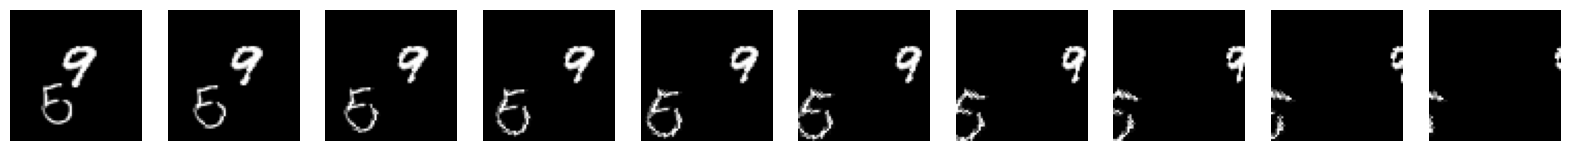

In [ ]:
show_images(sequence, figsize=(20,10))

In [ ]:
t = sequence
type(t), t.shape

(torch.Tensor, torch.Size([10, 1, 64, 64]))

## Dataloader

This dataset is randomly creating sequences on the fly, so the dataloader is just going to generate a batch...

In [ ]:
batch = ds.get_batch(bs=128)

In [ ]:
batch.shape

torch.Size([128, 10, 1, 64, 64])

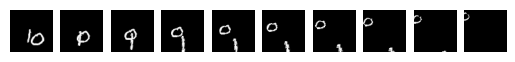

In [ ]:
show_images(batch[0])

the dataloader also is normalizing the inputs for you, after constructing the batch.

In [ ]:
ds.batch_tfms

Compose(
    ConvertImageDtype()
)